## CarpeDM 2017 week 2

강의 내용이 점점 어려워지고 있군요. 
그런고로 둘째주 활동 내용을 준비해보았습니다!!

**경사하강법(Gradient Descent Method)**

https://en.wikipedia.org/wiki/Gradient_descent <br/>
http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html <br/>

신경망 네트워크를 통해 목적함수를 적합할 때, 우리는 목적함수와의 오차를 줄이기 위해 네트워크의 여러 모수를 조금씩 조정해야 합니다. Coursera 강의에서는 아직까지는 모든 데이터의 미분값을 구해 더해주는 방식인 배치 경사하강법(Batch Gradient Descent)만을 사용했는데요, 이외에 또 어떤 방법이 있는지 알아보고 그 특징들을 비교해봅시다.

저 위의 위키피디아를 통해 다음의 방법들을 알아보고 아래의 함수에 대해 직접 구현해봅시다.

$$f(x,y) = e^{-x}\cos{x}\cos{y}$$

**활동 내용**
- 다음의 업데이팅 방법들을 파이썬 코드로 구현해봅시다. input은 이전 기수의 (x,y) 좌표와 필요한 모수들을 전부 이용합시다.
    - Momentum
    - RMSprop
    - Adam
- 함수 $f(x,y)$에 대해 초깃값을 원점 근방으로 두고, 함수값이 최소가 되는 방향으로 $(x,y)$를 업데이팅해봅시다.
- 함수 $f(x,y)$를 3차원 그래프로 나타내고, 그 위에 업데이팅 과정을 함께 나타내어봅시다. 
- numpy, matplotlib 패키지를 이용합시다.

**제출 기한 및 방법**
- 제출 기한은 10월 1일 일요일 자정까지입니다.
- 함수를 구현하는 코드 블럭이 하나, 함수들을 플롯하는 코드 블럭이 또 하나, 이렇게 총 두 블럭을 채워주시면 됩니다.
- https://github.com/CarpeDM2017/StudyML 에 자신의 이름 이니셜로 생성한 폴더 안에 week2.ipynb 로 저장합니다.
- 저장하는 방법은 깃헙 홈페이지나 GitHub Desktop 프로그램, 또는 커맨드 명령어 등을 통해 자유롭게 해주시면 됩니다.
- 커맨드 명령어를 이용하고자 하실 경우, 반드시 git push 전에 git pull -> git add -> git commit -> git push 순서로 해주세요.

In [10]:
import numpy as np

### 이 블럭에 각 함수를 정의합니다. ###

"""
가장 기초적인 경사하강법을 정의하는 예시입니다.

learning_rate = 1e-3
n_iteration = 1e3

def bgd(x,y) :
    
    dx = -np.exp(-x)*(np.cos(x)+np.sin(x))*np.cos(y)
    dy = -np.exp(-x)*np.cos(x)*np.sin(y)
    
    x = x - dx * learning_rate
    y = y - dy * learning_rate
    
    return x, y

"""


def bgd(x,y) :
    
    dx = -np.exp(-x)*(np.cos(x)+np.sin(x))*np.cos(y)
    dy = -np.exp(-x)*np.cos(x)*np.sin(y)
    
    x = x - dx * learning_rate
    y = y - dy * learning_rate
    
    return x, y


def Momentum(x, y, V, learning_rate, gamma=0.9):
    dx = -np.exp(-x) * (np.cos(x) + np.sin(x)) * np.cos(y)
    dy = -np.exp(-x) * np.cos(x) * np.sin(y)
    
    V['dx'] = gamma * V['dx'] + learning_rate * dx
    V['dy'] = gamma * V['dy'] + learning_rate * dy
    
    x = x - V['dx']
    y = y - V['dy']
    
    return x, y


def RMSprop(x, y, S, learning_rate, gamma=0.999, epsilon=1e-8):
    dx = -np.exp(-x) * (np.cos(x) + np.sin(x)) * np.cos(y)
    dy = -np.exp(-x) * np.cos(x) * np.sin(y)
    
    S['dx'] = gamma * S['dx'] + (1 - gamma) * np.square(dx)
    S['dy'] = gamma * S['dy'] + (1 - gamma) * np.square(dy)
    
    x = x - learning_rate / np.sqrt(S['dx'] + epsilon) * dx
    y = y - learning_rate / np.sqrt(S['dy'] + epsilon) * dy
    
    return x, y


def Adam(x, y, V, S, t, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    dx = -np.exp(-x) * (np.cos(x) + np.sin(x)) * np.cos(y)
    dy = -np.exp(-x) * np.cos(x) * np.sin(y)
    
    V['dx'] = beta1 * V['dx'] + (1 - beta1) * dx
    V['dy'] = beta1 * V['dy'] + (1 - beta1) * dy
    
    S['dx'] = beta2 * S['dx'] + (1 - beta2) * np.square(dx)
    S['dy'] = beta2 * S['dy'] + (1 - beta2) * np.square(dy)
    
    Vdx_corrected = V['dx'] / (1 - beta1 ** t)
    Vdy_corrected = V['dy'] / (1 - beta1 ** t)
    
    Sdx_corrected = S['dx'] / (1 - beta2 ** t)
    Sdy_corrected = S['dy'] / (1 - beta2 ** t)
    
    x = x - learning_rate / np.sqrt(Sdx_corrected + epsilon) * Vdx_corrected
    y = y - learning_rate / np.sqrt(Sdy_corrected + epsilon) * Vdy_corrected
    
    return x, y



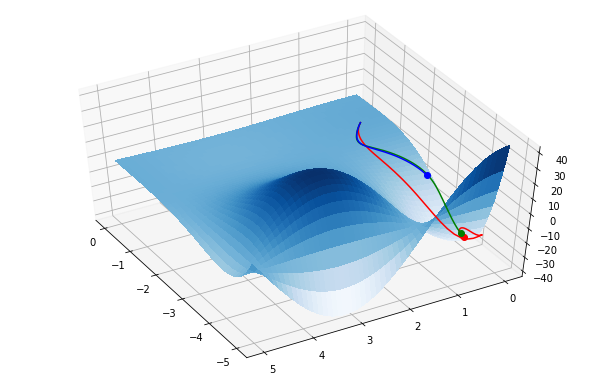

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

% matplotlib inline



learning_rate = 1e-3
num_iter = int(1e3)

### 이 블럭에 업데이팅 과정을 나타내어봅시다. ###

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
elev = 50    # elevation of camera
rotate = 150    # rotation of camera
ax.view_init(elev, rotate)

X = np.arange(-5,0,0.01)
Y = np.arange(0,5,0.01)
X, Y = np.meshgrid(X,Y)
Z = np.exp(-X)*np.cos(X)*np.cos(Y)

surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('Blues'), linewidth=0, antialiased=False)


x_start = -1.0
y_start = 0.5

# Momentum
x = x_start
y = y_start
X_momentum = [x]
Y_momentum = [y]
V = {'dx': 0, 'dy': 0}

for t in range(num_iter):
    x, y = Momentum(x, y, V, learning_rate)
    X_momentum.append(x)
    Y_momentum.append(y)

X_momentum = np.array(X_momentum)
Y_momentum = np.array(Y_momentum)
Z_momentum = np.exp(-X_momentum) * np.cos(X_momentum) * np.cos(Y_momentum)

# RMSprop
x = x_start
y = y_start
X_RMS = [x]
Y_RMS = [y]
S = {'dx': 0, 'dy': 0}

for t in range(num_iter):
    x, y = RMSprop(x, y, S, learning_rate)
    X_RMS.append(x)
    Y_RMS.append(y)

X_RMS = np.array(X_RMS)
Y_RMS = np.array(Y_RMS)
Z_RMS = np.exp(-X_RMS) * np.cos(X_RMS) * np.cos(Y_RMS)

#Adam
x = x_start
y = y_start
X_Adam = [x]
Y_Adam = [y]
S = {'dx': 0, 'dy': 0}
V = {'dx': 0, 'dy': 0}

for t in range(num_iter):
    x, y = Adam(x, y, V, S, t+1, learning_rate)
    X_Adam.append(x)
    Y_Adam.append(y)

X_Adam = np.array(X_Adam)
Y_Adam = np.array(Y_Adam)
Z_Adam = np.exp(-X_Adam) * np.cos(X_Adam) * np.cos(Y_Adam)


line_momentum, = ax.plot([], [], [], 'r', label='Momentum')
line_RMS, = ax.plot([], [], [], 'g', label='RMSprop')
line_Adam, = ax.plot([], [], [], 'b', label='Adam')

point_momentum, = ax.plot([], [], [], 'ro', label="Momentum_p")
point_RMS, = ax.plot([], [], [], 'go', label="RMSprop_p")
point_Adam, = ax.plot([], [], [], 'bo', label='Adam_p')

lines = [line_momentum, line_RMS, line_Adam]
points = [point_momentum, point_RMS, point_Adam]
Xs = [X_momentum, X_RMS, X_Adam]
Ys = [Y_momentum, Y_RMS, Y_Adam]
Zs = [Z_momentum, Z_RMS, Z_Adam]

"""
def update(num, Xs, Ys, Zs, points, lines):
    for i in range(3):
        points[i].set_data(Xs[i][num], Ys[i][num])
        points[i].set_3d_properties(Zs[i][num])
        lines[i].set_data(Xs[i][:num], Ys[i][:num])
        lines[i].set_3d_properties(Zs[i][:num])
    
anim = animation.FuncAnimation(fig, update, num_iter, fargs=(Xs, Ys, Zs, points, lines), interval=10, blit=False)
HTML(anim.to_html5_video())
"""

for i in range(3):
    lines[i].set_data(Xs[i], Ys[i])
    lines[i].set_3d_properties(Zs[i])
    points[i].set_data(Xs[i][-1], Ys[i][-1])
    points[i].set_3d_properties(Zs[i][-1])

plt.show()

In [17]:
def update(num, Xs, Ys, Zs, points, lines):
    for i in range(3):
        points[i].set_data(Xs[i][num], Ys[i][num])
        points[i].set_3d_properties(Zs[i][num])
        lines[i].set_data(Xs[i][:num], Ys[i][:num])
        lines[i].set_3d_properties(Zs[i][:num])
    
anim = animation.FuncAnimation(fig, update, num_iter, fargs=(Xs, Ys, Zs, points, lines), interval=10, blit=False)
HTML(anim.to_html5_video())
